# **Aprendizaje no supervisado**
## **Análisis de Componenetes Principales**

**Docente:** PhD Jorge Rudas

**Diseño de prototipos - 2025 I**

**INFOTEP**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
class PCA:
    '''
    Implementación de una clase para Análisis de Componentes Principales
    '''

    def __init__(self, n_componentes = 2):
        """
        Constructor de objetos PCA

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas
            n_componentes (int): Número de componentes a utilizar
        """

        self.n_componentes = n_componentes
        self.valores_propios = None
        self.vectores_propios = None

    def estandarizar(self, data):
        """
        Función para estandarizar datos númericos (media 0 y varianza 1)

        Parametros:
            data (numpy array): Numpy Array con datos de la forma muestras x caracteristicas

        Return:
            z (numpy array): Datos estandarizados
        """

        #Se resta la media de cada caracteristica a cada caracteristica y se divide con la DS de cada caracteristica
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z

    def calc_matriz_covarianza(self):
        """
        Función para calcular la matriz de covarianza de un numpy array

        Return:
            covmat (numpy array): Matriz de covarianza
        """

        covmat = np.cov(self.datos_estandarizados.T)

        return covmat

    def valores_vectores_propios(self, covmat):
        #Se calculan los valores y vectores propios de la matrix de covarianza
        valores_propios, vectores_propios = np.linalg.eig(covmat)

        return valores_propios, vectores_propios

    def vector_caracteristicas(self, valores_propios, vectores_propios):
        #Se seleccionan los indices de los n_componentes con los mayores valores propios
        n_cols = np.argsort(valores_propios)[::-1][:self.n_componentes]

        #Se seleccionan los n_componentes vectores propios con mayor poder explicativo
        vector_caracteristica = vectores_propios[:,n_cols]
        print("Caracteristicas seleccionadas para el vector de caracteristicas")
        print(n_cols)
        return vector_caracteristica

    def proyectar(self, vectores_caracteristica):
        """
        Función para proyectar los datos originales sobre el espacio de los componentes de PCA

        Parametros:
            vectores_caracteristica (numpy array): Vector de caracteristica

        Return:
            P (numpy array): Datos originales proyectados al vector de caracteristicas
        """

        P = np.dot(self.datos_estandarizados, vectores_caracteristica)
        return P

    def dibujar(self, titulo, features, target, pca_data):
        fig ,ax = plt.subplots(1, 1, figsize=(10,6))

                #chart tags
        ax.set_title(titulo)
        ax.set_xlabel(features[0])
        ax.set_ylabel(features[1])

        #drawing the scatterplot
        sns.scatterplot(
            x = pca_data[:,0],
            y = pca_data[:,1],
            hue = target
        )

        print(pca_data.shape)
        sns.despine()
        plt.show()

    def run(self, data):

        self.n_muestras = data.shape[0]
        self.datos_estandarizados = self.estandarizar(data)

        covmat = self.calc_matriz_covarianza()

        self.valores_propios, self.vectores_propios = self.valores_vectores_propios(covmat)

        self.vector_caracteristica = self.vector_caracteristicas(self.valores_propios, self.vectores_propios)

        datos_proyectados = self.proyectar(self.vector_caracteristica)

        return datos_proyectados

In [ ]:
#Se carga el DataSet
diabetes = datasets.load_diabetes()

data = diabetes.data
target = diabetes.target

In [ ]:
#Experimento 1
pca = PCA()
datos_pca = pca.run(data)


Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
print("% de varianza descrita por cada caracteristica")
print(pca.valores_propios/np.sum(pca.valores_propios) * 100)

% de varianza descrita por cada caracteristica
[40.2421075  14.92319678 12.05966259  9.55476403  0.0856073   0.78320024
  6.62181391  4.33682036  6.02717076  5.36565652]


(442, 2)


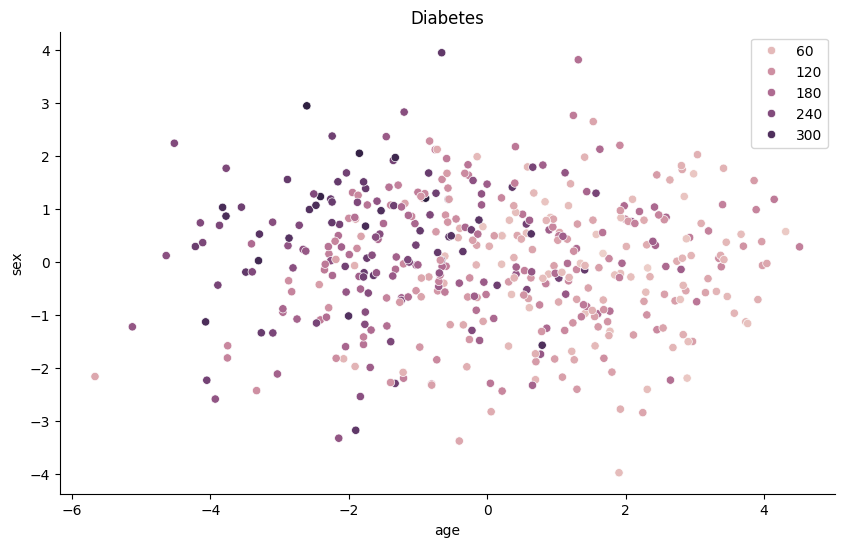

In [ ]:
pca.dibujar("Diabetes", diabetes.feature_names[0:2], target, datos_pca)

##**Taller # 1**

* Utilizar dataset blue jays
* Realizar analisis bivariado todos contra todos tal como se explicó
* Interpretar resultados del analisis bivariado
* Calcule la matriz de covarianza y sus valores y vectores propios (discuta los resultados con su grupo)
* Determine cuantos y cuales componentes son necesarios para describir el 90% de la varianza de los datos

In [ ]:
import pandas as pd
import itertools

In [ ]:
"""
Importación del archivo CSV
"""

data_blue_jays = pd.read_csv("sample_data/blue_jays.csv")

data_blue = data_blue_jays.select_dtypes(include=[np.number])

In [ ]:
pca = PCA()
datos_pca = pca.run(data_blue)

Caracteristicas seleccionadas para el vector de caracteristicas
[0 1]


In [ ]:
"""
Columnas de datos
"""

features = ['bill_depth_mm', 'bill_width_mm', 'bill_length_mm',  'head_length_mm', 'body_mass_g', 'skull_size_mm']

(123, 2)


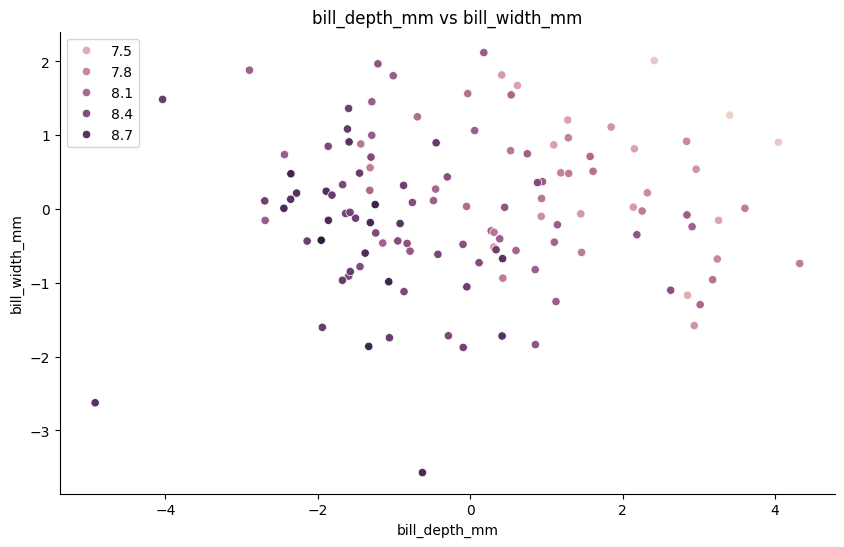

(123, 2)


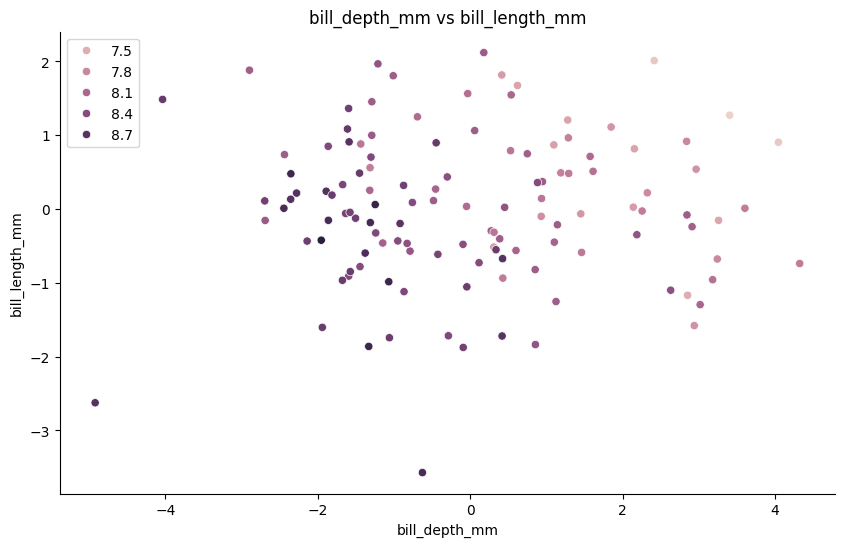

(123, 2)


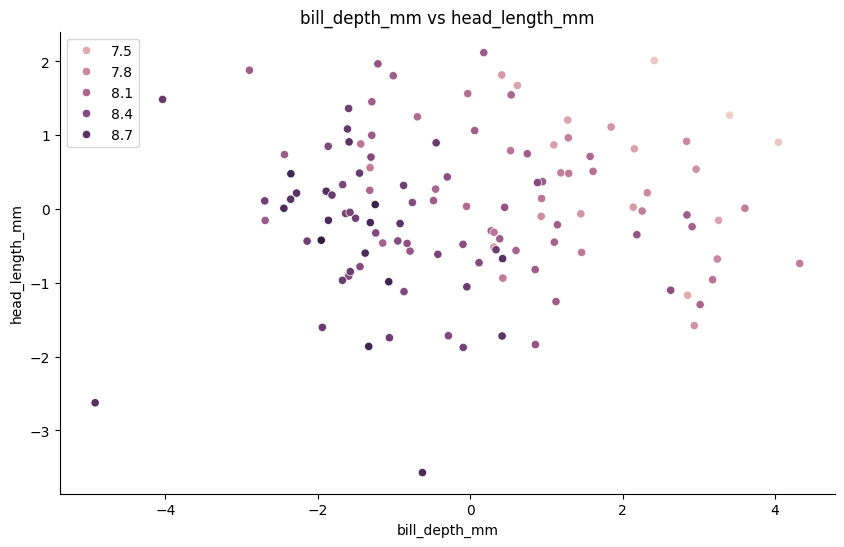

(123, 2)


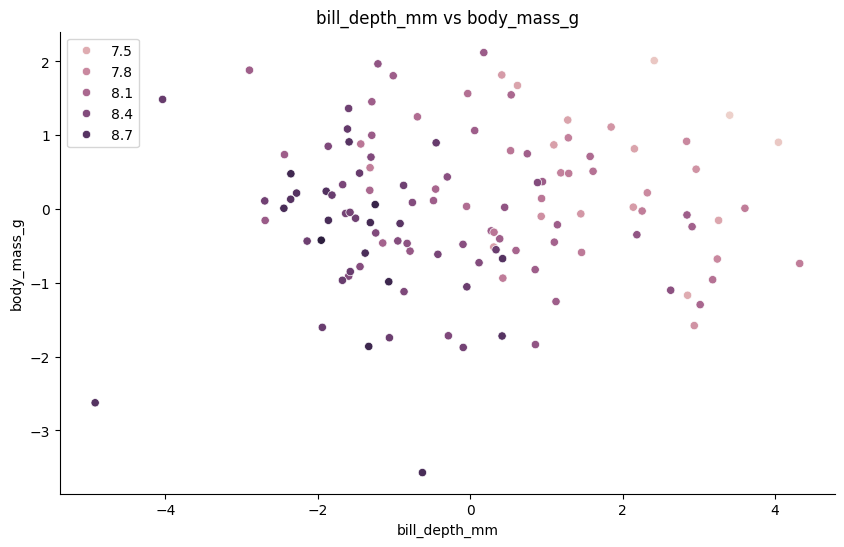

(123, 2)


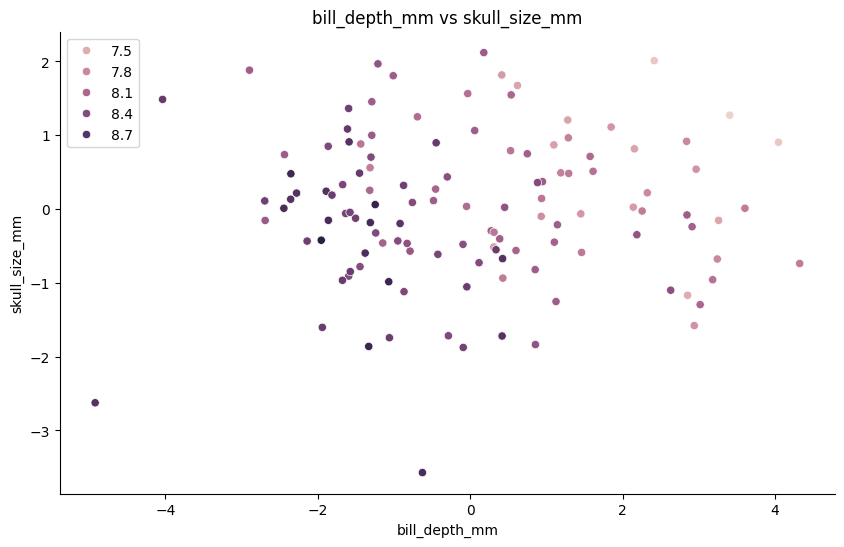

(123, 2)


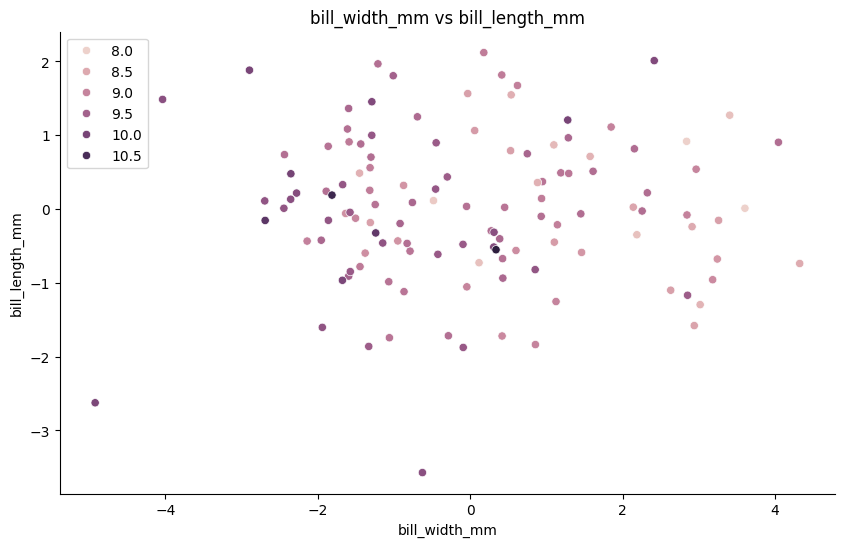

(123, 2)


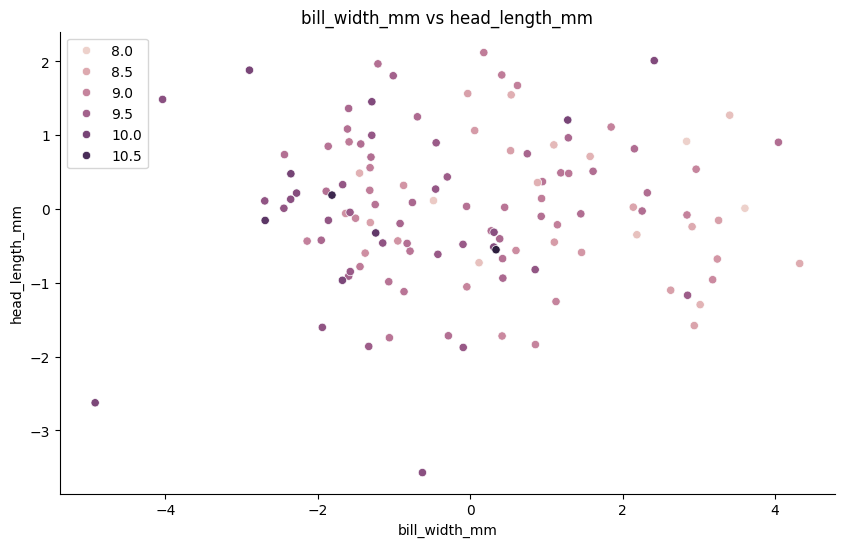

(123, 2)


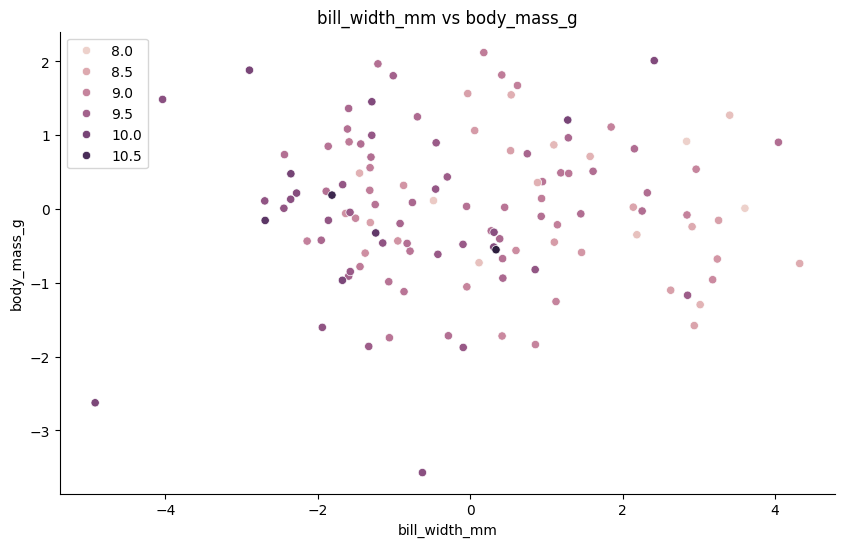

(123, 2)


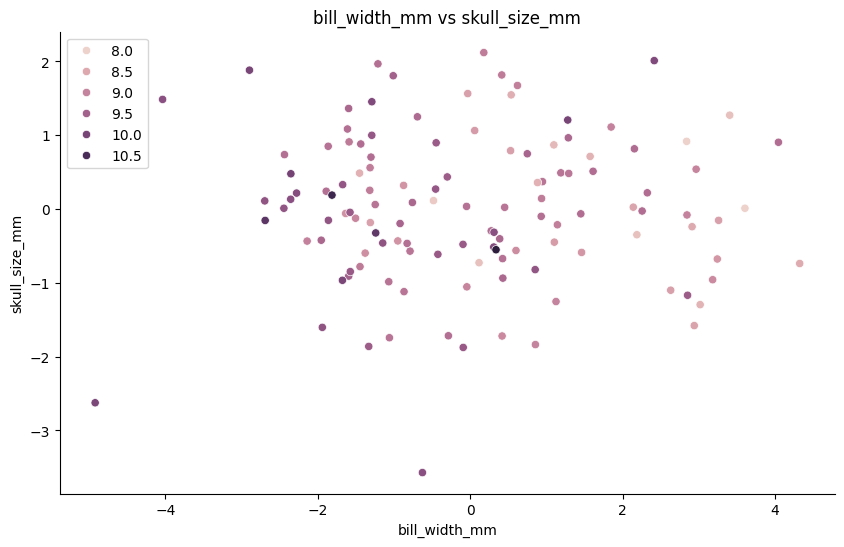

(123, 2)


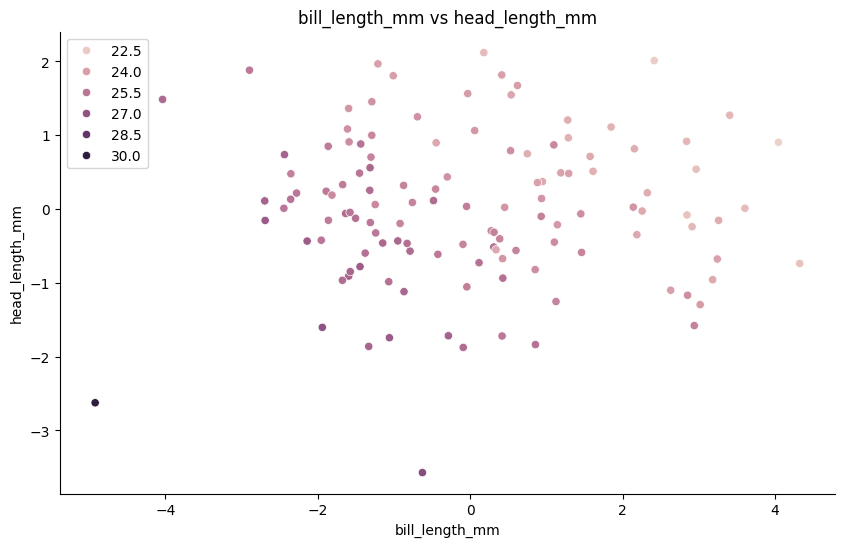

(123, 2)


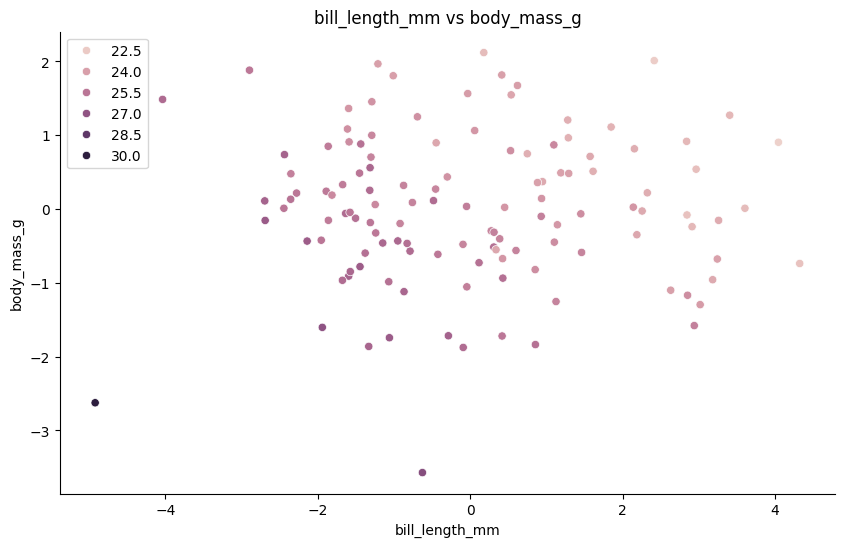

(123, 2)


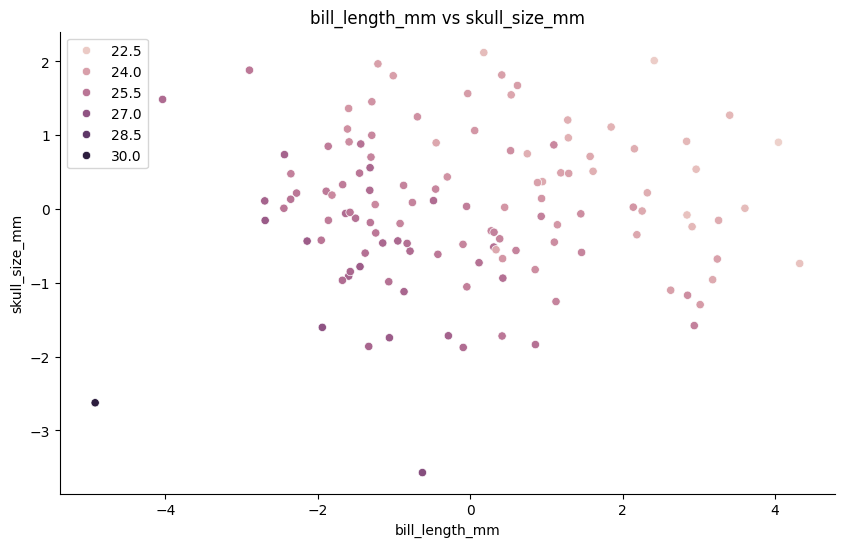

(123, 2)


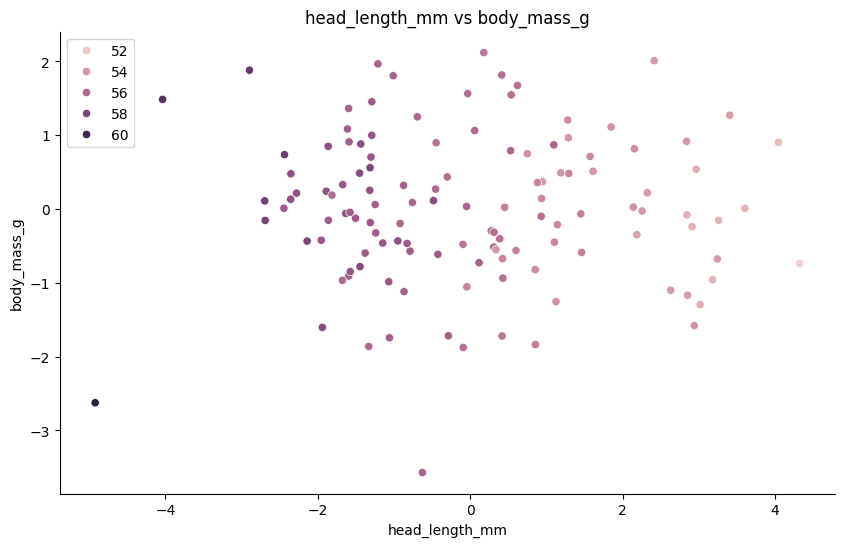

(123, 2)


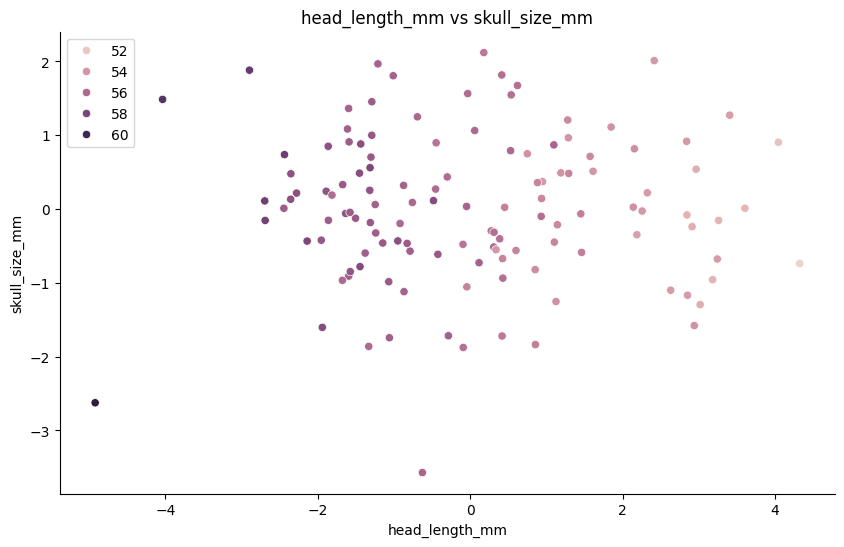

(123, 2)


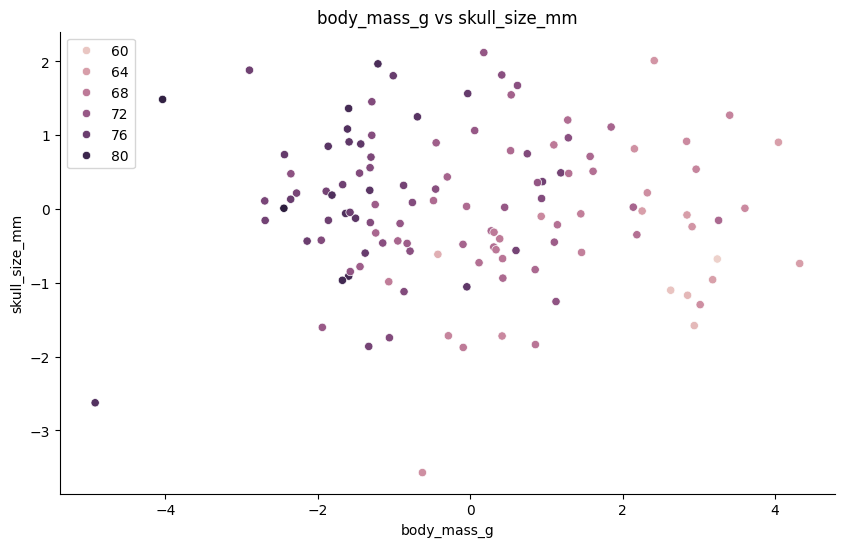

In [ ]:
"""
Aplicamos un for para que me recorra y me generé las gráficas
de todas las posibles combinaciones de 2 variables
"""

for col1, col2 in itertools.combinations(features, 2):
  feature = [col1, col2]
  target = col1

  # Transformación a nump Array
  target = data_blue_jays[target].to_numpy()
  name = col1 + " vs " + col2


  pca.dibujar(name, feature, target, datos_pca)

# Analisis
* En las primeras cuatro gráficas, se observa que las comparaciones presentan datos similares, con valores que oscilan entre 7.5 y 8.7. A partir de la quinta gráfica, los valores muestran un incremento progresivo, pasando de 8.0 a 10.5, y así sucesivamente.

* También  se observa una distribución  de los  puntos muy similar lo que sugiere un patrón común de los datos representados en las graficas.


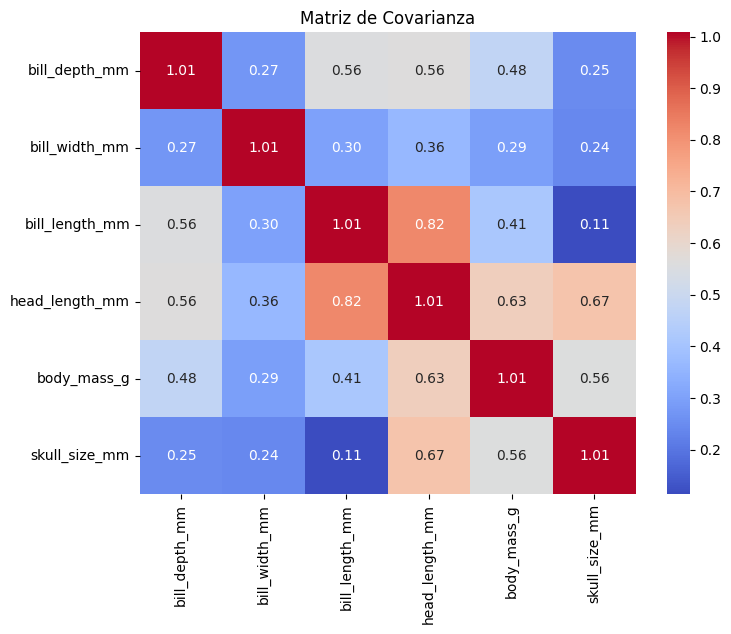

In [ ]:
"""
Generar la matriz de covarianza
"""

# Seleccionar variables
datos = data_blue_jays[features]

# Calcula la matriz de covarianza
matriz_covarianza = pca.calc_matriz_covarianza()

# Se crea el DataFrame de la matriz de covarianza con los nombres de las variables
matriz_cov_df = pd.DataFrame(matriz_covarianza, index=datos.columns, columns=datos.columns)

# Se grafica la matriz de covarianza
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cov_df, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Covarianza")
plt.show()


# Análisis
La anterior imagen de la matriz de covarianza visualizamos aquellas variables que tienen una correlación, tenemos un total de 6 variables y entre ellas hay 1 correlación, así como se muestra en la gráfica.

In [ ]:
"""
Valores y vectores propios de la matriz de covarianza
"""
valores_propios, vectores_propios = np.linalg.eig(matriz_covarianza)

# Se crea un DataFrame para mostrar los valores propios
df_valores_propios = pd.DataFrame(valores_propios, index=datos.columns, columns=["Valor Propio"])
print("Valores propios:")
print(df_valores_propios)

# Se crea un DataFrame para mostrar los vectores propios
df_vectores_propios = pd.DataFrame(vectores_propios, index=datos.columns, columns=[f"Componente {i+1}" for i in range(len(valores_propios))])
print("\nVectores propios:")
print(df_vectores_propios)


Valores propios:
                Valor Propio
bill_depth_mm       3.272859
bill_width_mm       1.011557
bill_length_mm      0.813786
head_length_mm      0.546815
body_mass_g         0.404161
skull_size_mm       0.000002

Vectores propios:
                Componente 1  Componente 2  Componente 3  Componente 4  \
bill_depth_mm      -0.396986     -0.342263      0.152676     -0.706650   
bill_width_mm      -0.281041     -0.044927     -0.958222     -0.028384   
bill_length_mm     -0.420931     -0.544180      0.136292      0.439217   
head_length_mm     -0.523158      0.007876      0.140754      0.404039   
body_mass_g        -0.430888      0.277788      0.125176     -0.356510   
skull_size_mm      -0.356198      0.712375      0.066667      0.128768   

                Componente 5  Componente 6  
bill_depth_mm      -0.450105      0.000178  
bill_width_mm       0.001570      0.000175  
bill_length_mm      0.141941      0.543185  
head_length_mm     -0.131443     -0.725195  
body_mass_g      

# Análisis

En valores propios podemos ver que hay una mayor variabilidad en bill_depth_mm con un valor de 3.27 y la variable skull_siza_mm con un valor muy bajo 0.000002

En los vectores propios, observamos 6 componentes, lo que es normal ya que hay 6 variables.

Componente 1: Los valores relevantes son (-0.523, -0.430, -0.420) que representa la longitud de la cabeza, masa corporal y longitud del pico. Puede representar el tamaño del pajarito.

Componente 2: Valores relevantes (0.712, -0.544) representa el tamaño del craneo y la longitud del pico, puede representa la relacion inversa entre estas dos variables.

Componente 3: Valores relevantes (-0.958, 0.152) representa el ancho del pico y la profundidad del pico, vemos que uno es negativo y otro positivo, hay una relacion inversa entre estas 2 variables.

Componente 4: Valores relevantes (-0.706, 0.439, 0.404) representa la profundidad del pico, longitud del pico y longitud de la cabeza.

Componente 5: Valores relevantes (-0.770, -0.450) representa la masa corporal, profundidad de la cabeza. Puede representar el tamaño de la cabeza dependiendo de la masa corporal y la profundidad de la cabeza del pajarito.

Componente 6: Valores relevantes (-0.725, 0.543, 0.423) representa la longitud de la cabeza, longitud del pico y tamaño de la cabeza. Puede representar la forma o estructura de la cabeza del pajarito.




In [ ]:
"""
Determinar cuantos componentes son necesarios para describir el 90% de la varianza de los datos
"""
varianza_exp = pca.valores_propios/np.sum(pca.valores_propios) * 100

print("\n% de varianza explicada por los cuatro componentes:")
print(varianza_exp[:4])


% de varianza explicada por los cuatro componentes:
[54.10418048 16.72220918 13.45283681  9.03948351]


# Análisis
Observamos que son necesarios 4 componentes para describir el 90% de los datos. Ahora, si sumamos las cifras, nos da un aprox de 93,3187%

En este análisis vemos varias formas de jugar con los datos, se aplicaron varios métodos para lograr resultados diferentes. Aquí vemos que tenemos nuevas formas de visualizar la información mientras se preserva la mayor parte de la varianza original. Así vemos como se transforma las variables originales en un nuevo conjunto de variables no correlacionadas, a lo que decimos componentes principales, los cuales se ordenan de acuerdo con la cantidad de varianza que explican. De esta manera se  simplifica la complejidad de los datos y facilita la identificación de patrones y tendencias.